In [64]:
from random import randint, shuffle, seed
import sys
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [65]:
from IPython.display import clear_output

In [66]:
from c2048 import Game, push

```python
import numpy as np
import theano
import theano.tensor as T
import lasagne
from lasagne.layers import DenseLayer, InputLayer, batch_norm, DropoutLayer
from lasagne.layers import  MergeLayer, ReshapeLayer, FlattenLayer, ConcatLayer
floatX = theano.config.floatX
from lasagne.nonlinearities import rectify, elu, softmax, sigmoid
from lasagne.init import Constant, Sparse
floatX = theano.config.floatX

from lasagne.layers.dnn import Conv2DDNNLayer
from lasagne.regularization import regularize_network_params, l1, l2, regularize_layer_params_weighted
```

In [67]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [68]:
floatX = 'float32'
def Winit(shape):
    rtn = np.random.normal(size=shape).astype(floatX)
    rtn[np.random.uniform(size=shape) < 0.9] *= 0.01
    return rtn

 ```python
 def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=16, out_channels=4, kernel_size=4)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=1)

        self.fc1 = nn.Linear(in_features=1*4, out_features=8)
        self.fc2 = nn.Linear(in_features=8, out_features=4)
        self.out = nn.Linear(in_features=4, out_features=1)
 ```

In [626]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

learning_rate = 0.001

N_FILTERS = 512
N_FILTERS2 = 4096

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(1,2))
        #self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(2,1))
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1,2))
        #self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(2,1))
        
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1,2))
        #self.pool = nn.MaxPool2d(2,2)
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=(2,1))
        


        self.fc1 = nn.Linear(in_features=1024, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
        self.out = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        print(x.shape)
        x = F.relu(self.conv1(x))
        print(x.shape)
        
        x = F.relu(self.conv2(x))
        print(x.shape)
        
        
        x = F.relu(self.conv3(x))
        print(x.shape)
        
        x = F.relu(self.conv4(x))
        print(x.shape)
        
        
        x = F.relu(self.conv5(x))
        print(x.shape)
        
        x = F.relu(self.conv6(x))
        print(x.shape)
        
        
        
        
        
        x = x.reshape(-1, 1024)
        print(x.shape)
        x = F.relu(self.fc1(x))
        print(x.shape)
        x = F.relu(self.fc2(x))
        print(x.shape)
        x = F.relu(self.fc3(x))
        print(x.shape)
        x = F.relu(self.fc4(x))
        print(x.shape)
        x = self.out(x)
        print(x.shape)
        return x
        
    

model = Network().to(device)

criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
## using Adam is not very good!!  betas=(0.5, 0.999) is not good!

cuda


In [627]:
model

Network(
  (conv1): Conv2d(16, 32, kernel_size=(1, 2), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(2, 1), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(1, 2), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 1), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(1, 2), stride=(1, 1))
  (conv6): Conv2d(512, 1024, kernel_size=(2, 1), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)

In [628]:
from random import randint
table ={2**i:i for i in range(1,16)}
table[0]=0
def make_input(grid):
    g0 = grid
    r = np.zeros(shape=(16, 4, 4), dtype=floatX)
    for i in range(4):
        for j in range(4):
            v = g0[i, j]
            r[table[v],i, j]=1
    return r

In [629]:
logf=open("logf-rl-pytorch-n-tuple-6", "w")
def printx(*a, **kw):
    print(*a, file=logf, flush=True, **kw)
    print(*a, flush=True, **kw)

In [630]:
from random import random, randint

In [631]:
def get_grid(driver):
    grid = np.zeros(shape=(4,4), dtype='uint16')
    for x in driver.find_elements_by_class_name('tile'):
        cl = x.get_attribute('class').split()
        for t in cl:
            if t.startswith('tile-position-'):
                pos = int(t[14])-1, int(t[16])-1
            elif t.startswith('tile-') and t[5].isdigit():
                v = int(t[5:])
        grid[pos[1], pos[0]] = v
    return grid

In [632]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [633]:
import math
import time
from collections import defaultdict
  
def Vchange(grid, v):
    g0 = grid.cpu().numpy()
    #print(type(g0))
    
    # g1 = torch.from_numpy(g0.cpu().numpy()[:,::-1,:].copy()).cuda()
    g1 = g0[:,::-1,:].copy()
    g2 = g0[:,:,::-1].copy()
    #g3 = g2.numpy()[:,::-1,:].copy()
    g3 = g2[:,::-1,:].copy()
    
    #g1 = g0[:,::-1,:]
    #g2 = g0[:,:,::-1]
    #g3 = g2[:,::-1,:]

    r0 = g0.swapaxes(1,2)
    #print(type(r0))
    
    #r1 = torch.from_numpy(r0.cpu().numpy()[:,::-1,:].copy()).cuda()
    r1 = r0[:,::-1,:].copy()
    r2 = r0[:,:,::-1].copy()
    r3 = r2[:,::-1,:].copy()
    
    #r1 = r0[:,::-1,:]
    #r2 = r0[:,:,::-1]
    #r3 = r2[:,::-1,:]
    xtrain = np.array([g0,g1,g2,g3,r0,r1,r2,r3], dtype=floatX)
    ytrain = np.array([v]*8, dtype=floatX)
    # Convert xtrain and ytrain to tensors
    xtrain = torch.from_numpy(xtrain).cuda()
    ytrain = torch.from_numpy(ytrain).cuda()
    
    print("x:   ", xtrain.shape)
    print("y:   ",ytrain.shape)
    
    #batch = [xtrain, ytrain]
    #loss = model.training_step(batch)
    
    prediction = model(xtrain)                  # Generate predictions
    loss = criterion(prediction, ytrain) # Calculate loss    
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #train_fn(xtrain, ytrain)

arrow=[Keys.ARROW_LEFT, Keys.ARROW_UP, Keys.ARROW_RIGHT, Keys.ARROW_DOWN]
def gen_sample_and_learn(driver, model):
    body = driver.find_element_by_tag_name('body')
    game_len = 0
    game_score = 0
    last_grid = None
    keep_playing =False
    while True:
        try:
            grid_array = get_grid(driver)
        except:
            grid_array = None
        board_list = []
        if grid_array is not None:
            if not keep_playing and grid_array.max()==2048:
                driver.find_element_by_class_name('keep-playing-button').click()
                keep_playing = True
                time.sleep(1)
            for m in range(4):
                g = grid_array.copy()
                s = push(g, m%4)
                if s >= 0:
                    board_list.append( (g, m, s) )
        if board_list:
            boards = np.array([make_input(g) for g,m,s in board_list], dtype=floatX)
            boards = torch.from_numpy(boards)
            boards = boards.cuda()
            #print(boards.device)
            #print(boards)
            print("boards: ", boards.shape)
            print(model(boards).shape)
            p = model(boards).flatten()  
            print(p.shape)
            #print(p.device)
            
            p.to(device)
            #print(p.device)
            
            game_len+=1
            best_move = -1
            best_v = None
            for i, (g,m,s) in enumerate(board_list):
                v = 2*s + p[i]
                if best_v is None or v > best_v:
                    best_v = v
                    best_move = m
                    best_score = 2*s
                    best_grid = boards[i]
            body.send_keys(arrow[best_move])
            game_score += best_score
        else:
            best_v = 0
            best_grid = None
        if last_grid is not None:
            Vchange(last_grid, best_v)       
        last_grid = best_grid
        if not board_list:
            break
        plt.pause(0.05)
    return game_len, grid_array.max(), game_score

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])


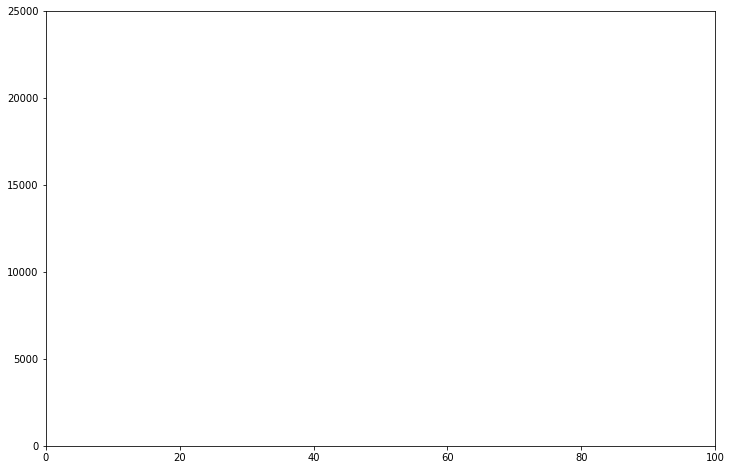

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

/home/jerry/anaconda3/envs/2048/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

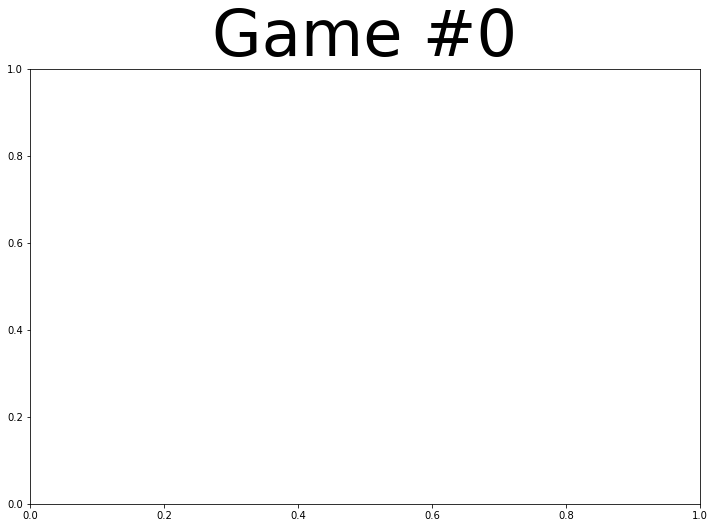

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Si

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.S

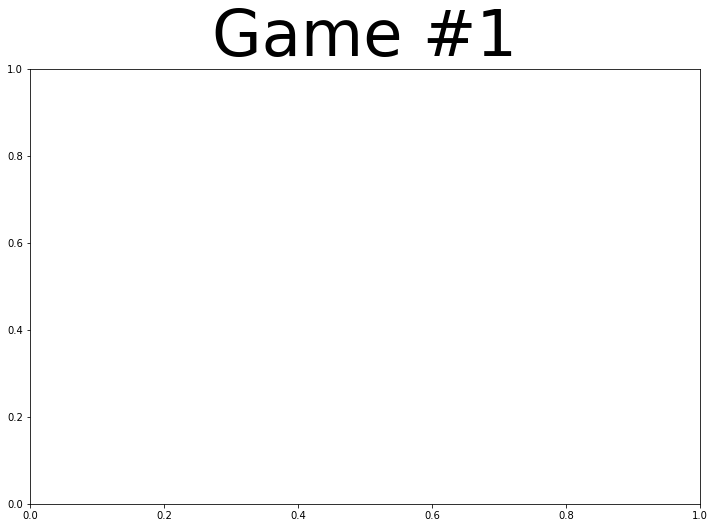

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

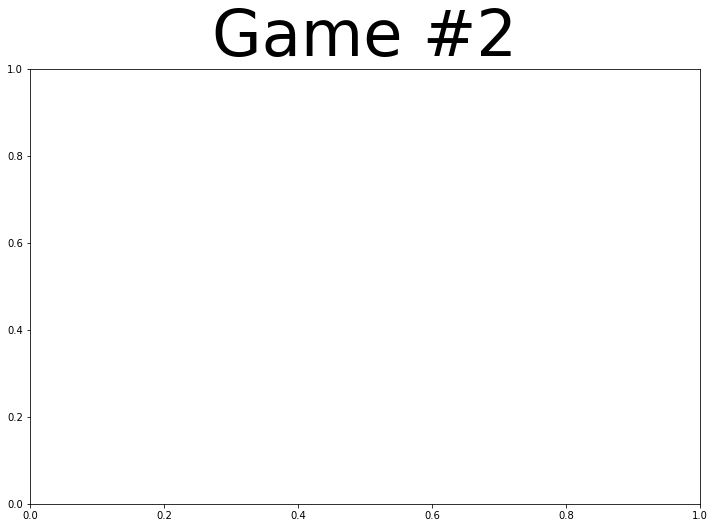

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

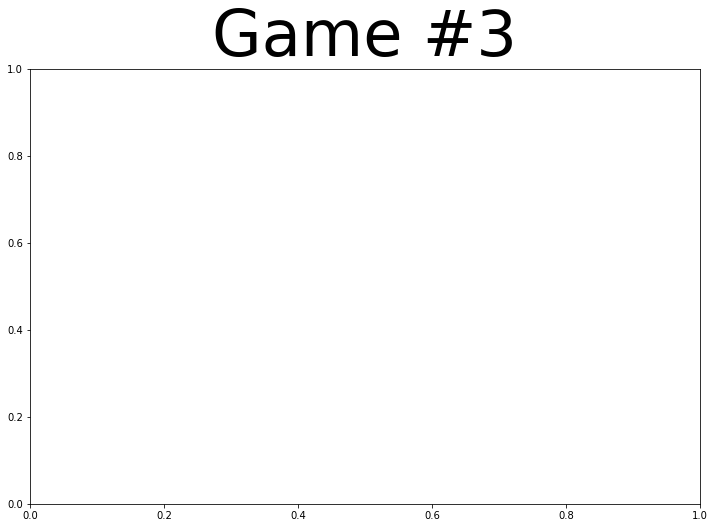

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torc

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4]

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
t

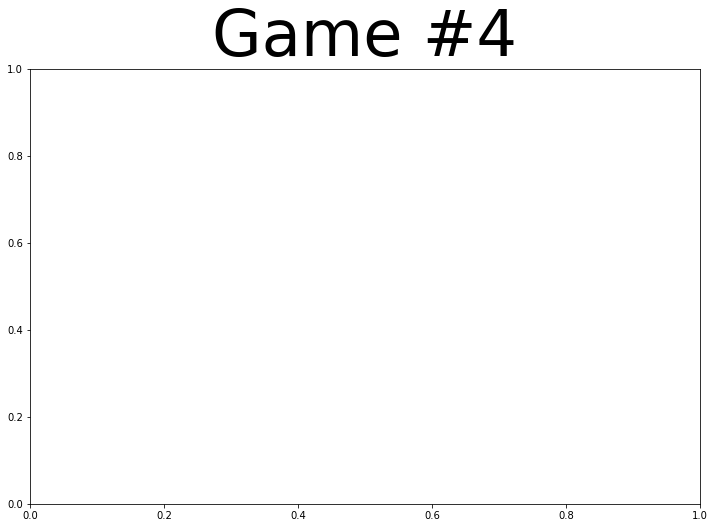

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
5 (118, 64, 976)


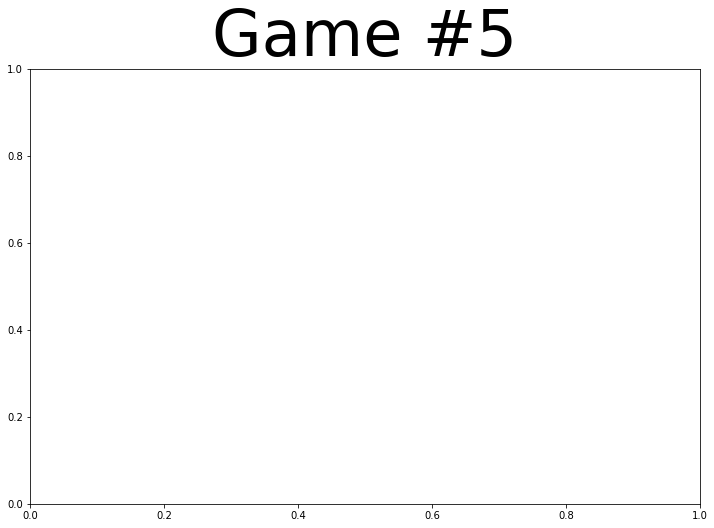

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
t

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
6 (113, 128, 1048)


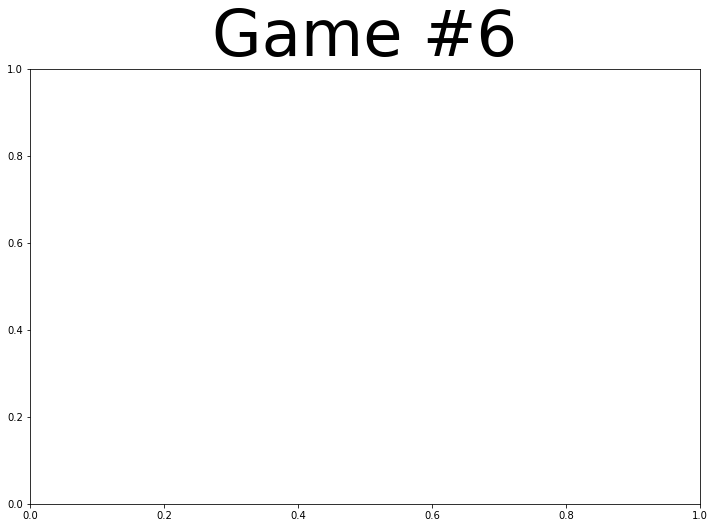

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

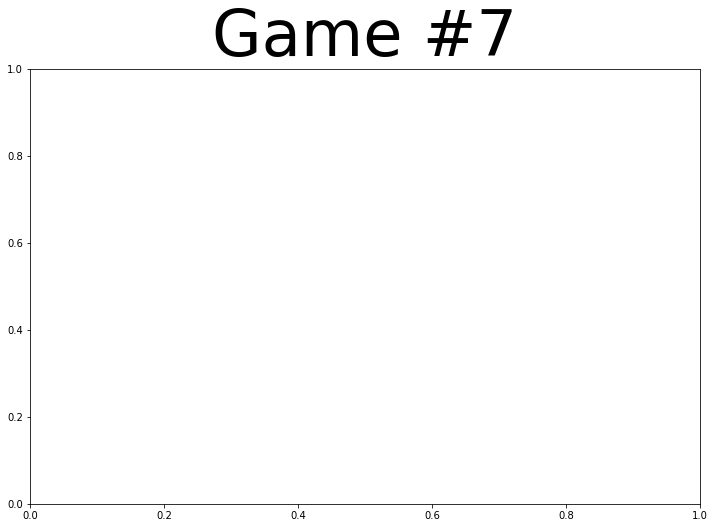

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.S

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size

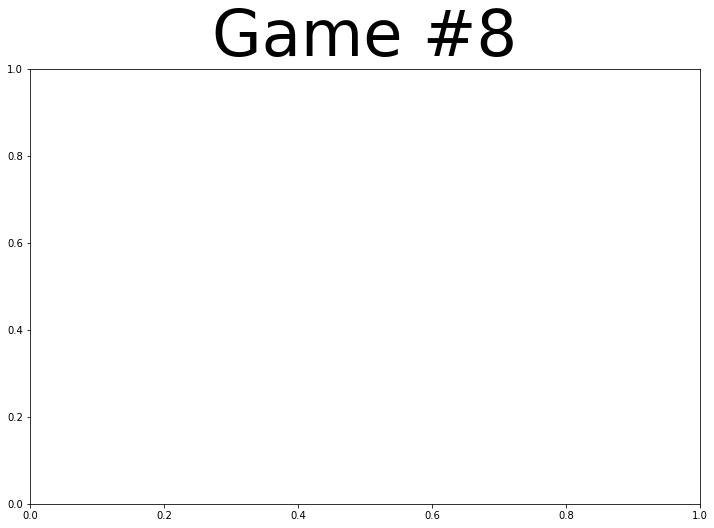

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

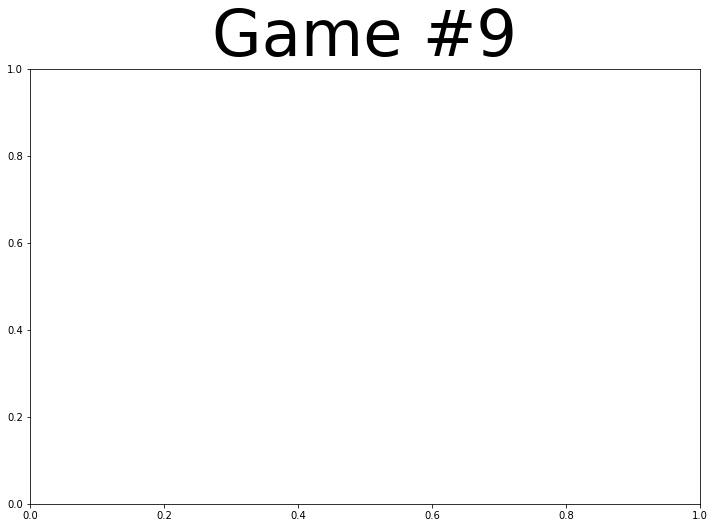

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.S

torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

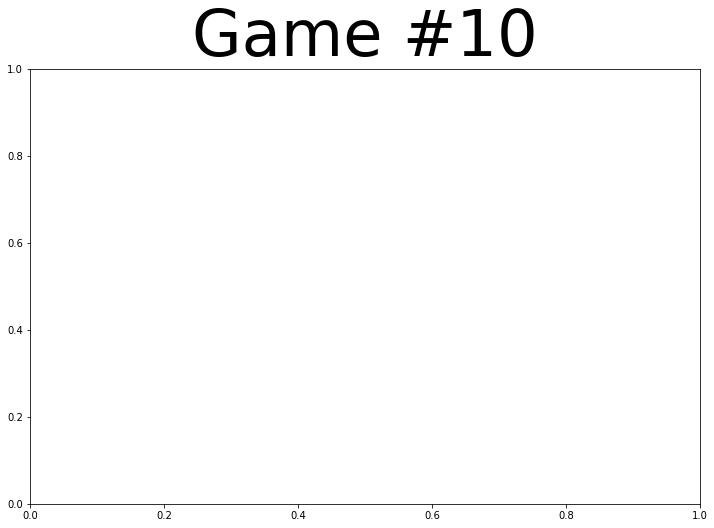

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
t

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

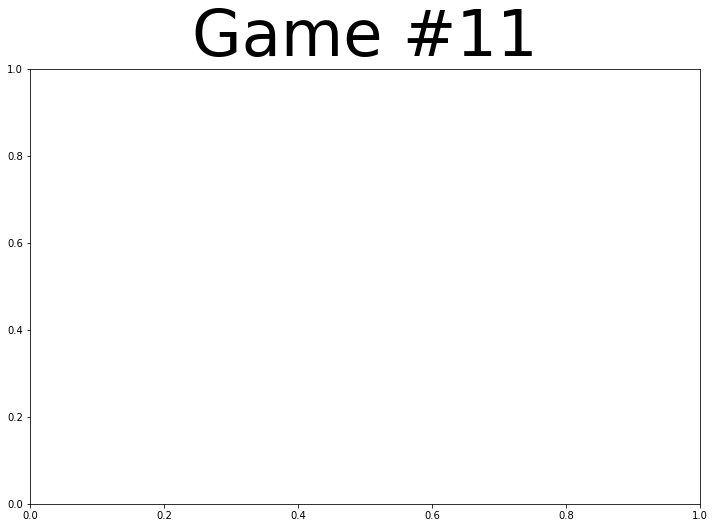

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torc

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 10

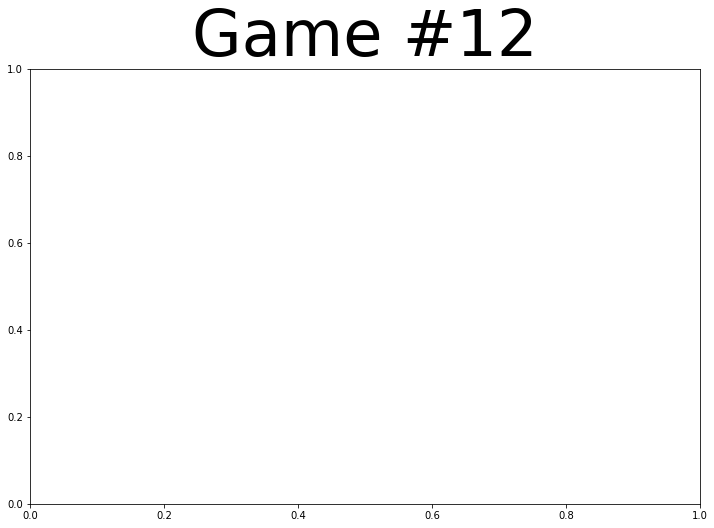

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:

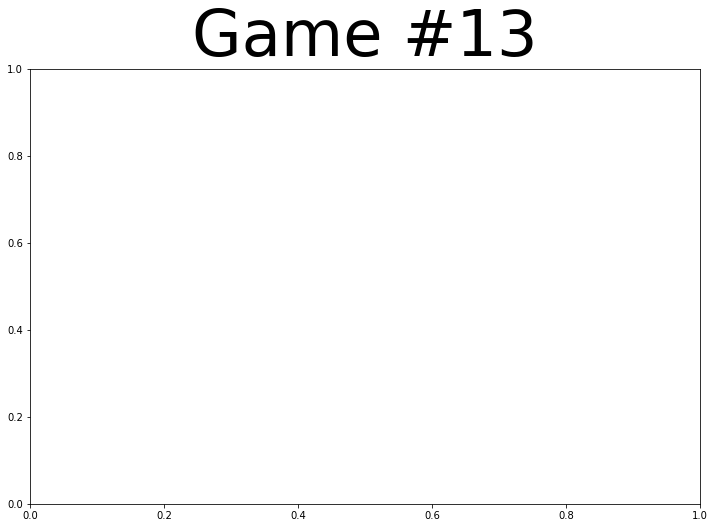

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

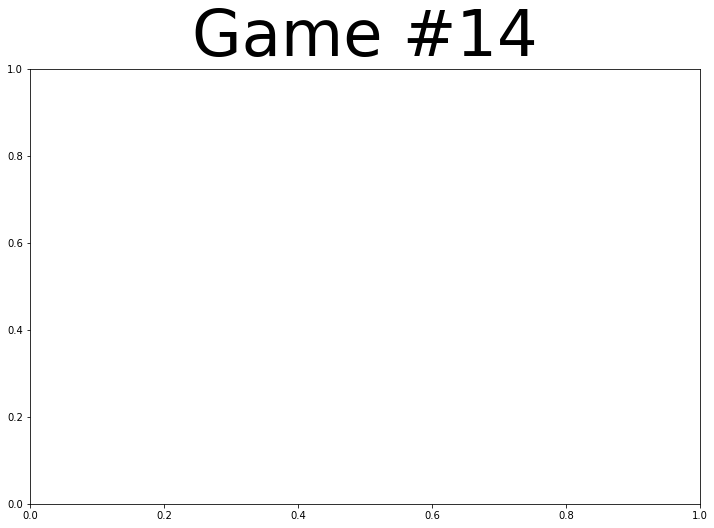

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Si

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

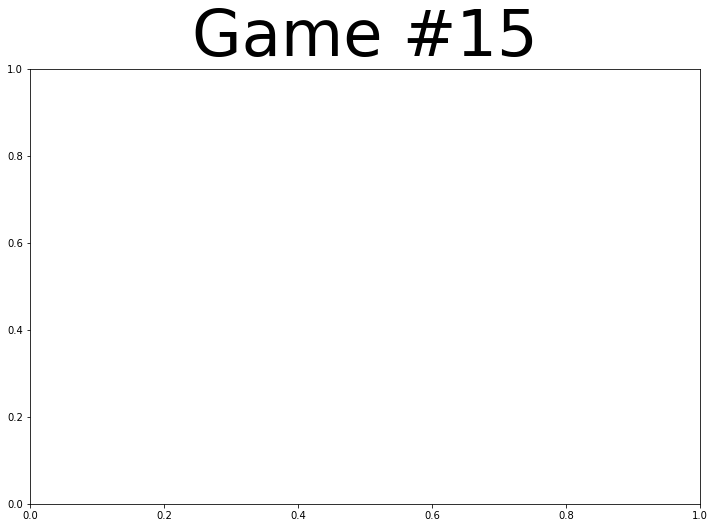

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

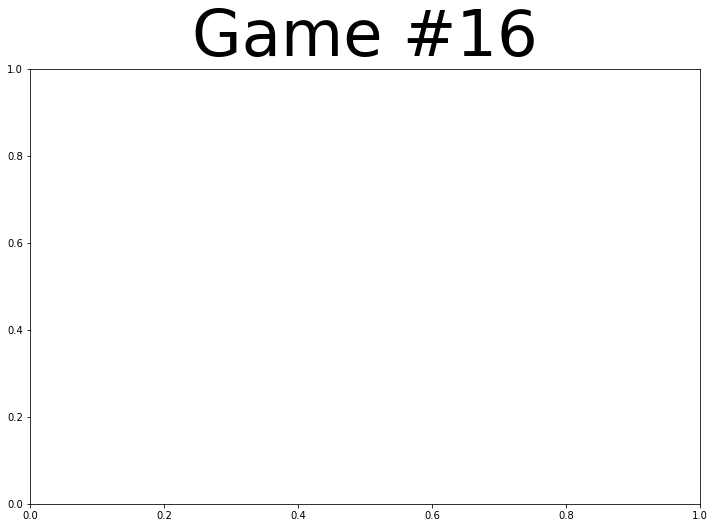

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 10

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
17 (206, 256, 2420)


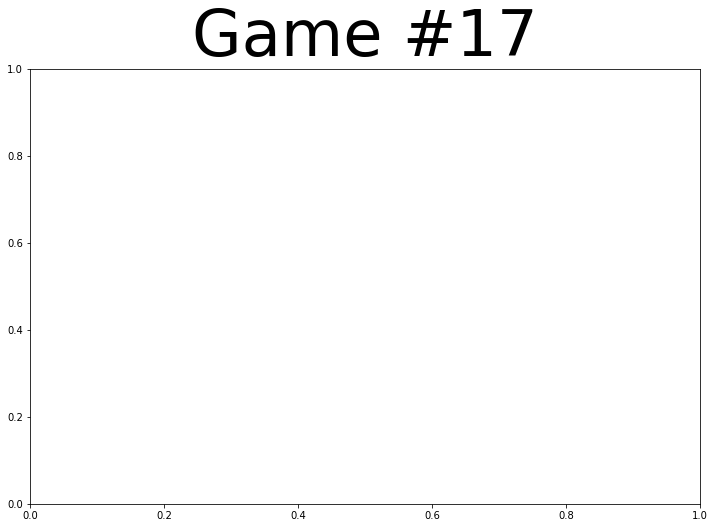

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])


boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4]

torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 10

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 10

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
18 (410, 128, 2452)


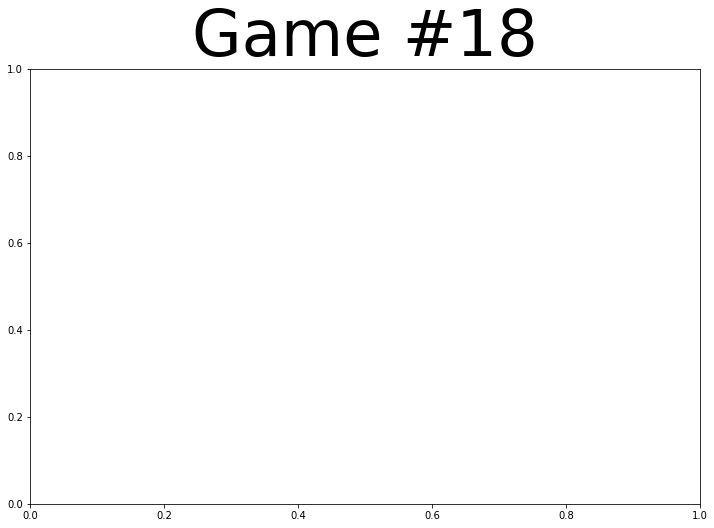

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

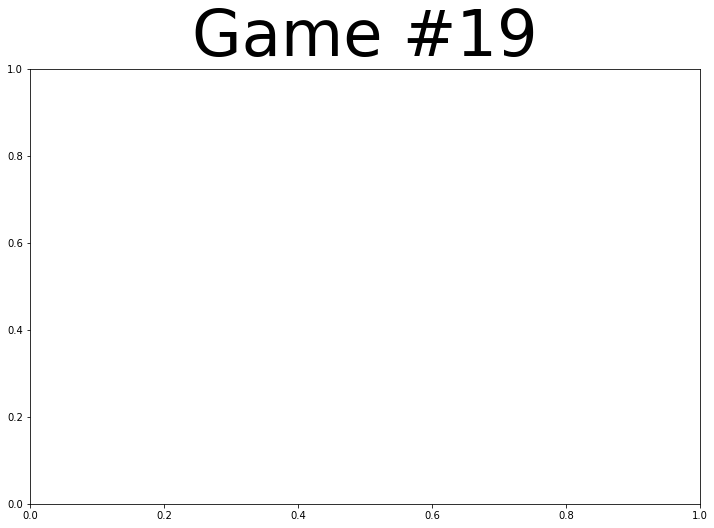

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

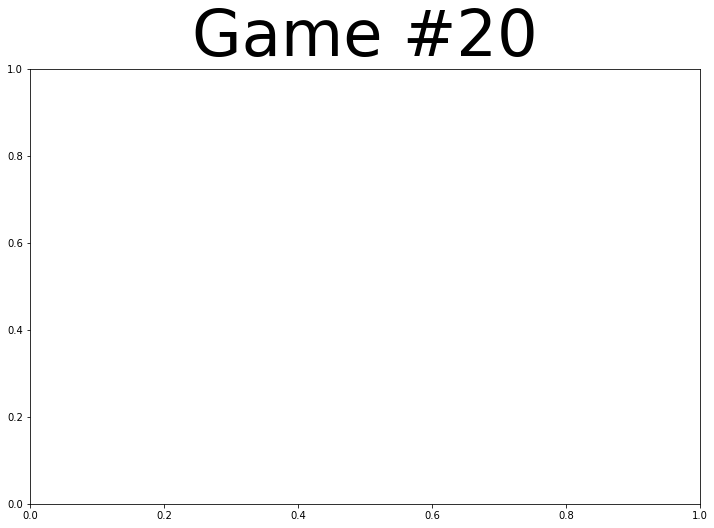

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 10

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

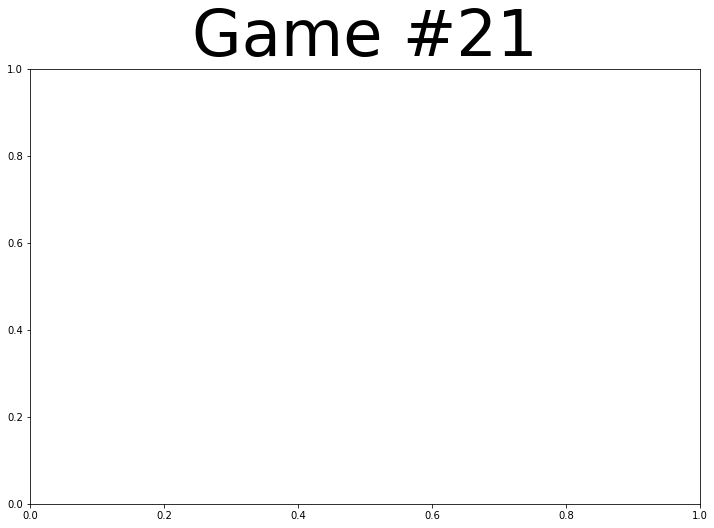

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

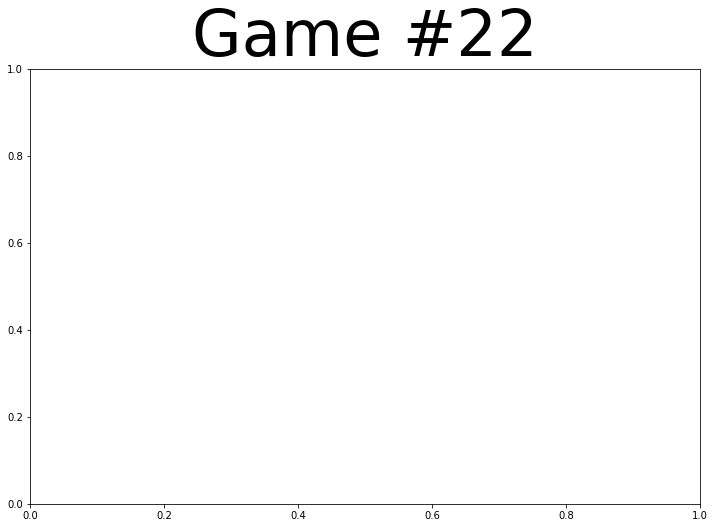

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

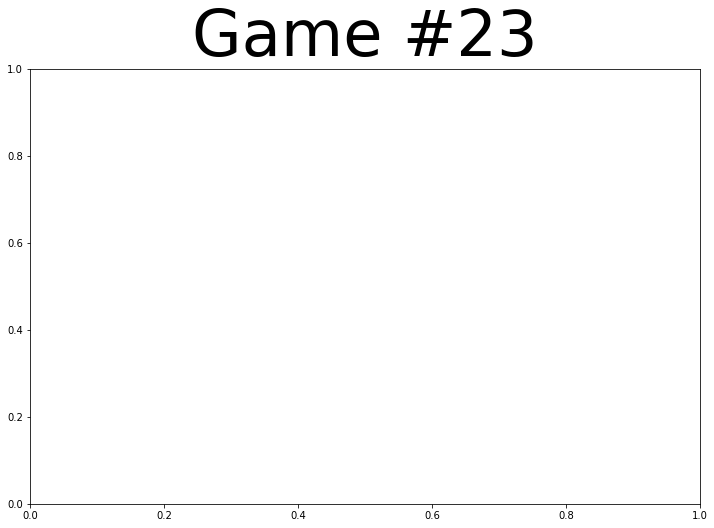

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
t

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch.Size([8, 64])
torch.Size([8, 10])
torch.Size([8, 1])
24 (230, 256, 2704)


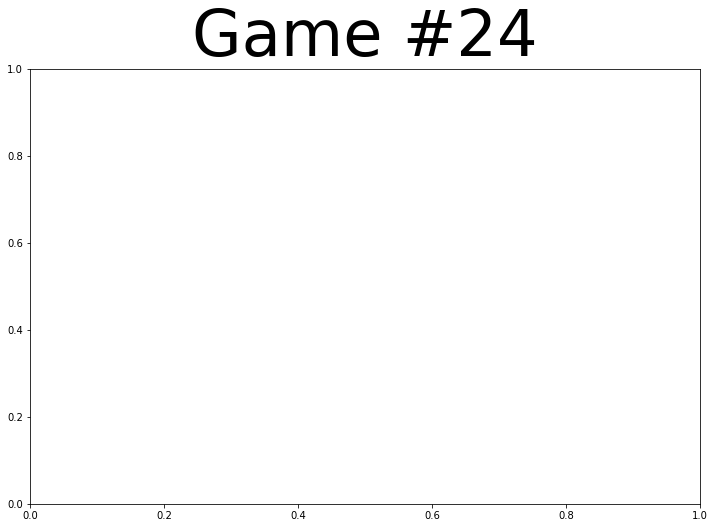

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

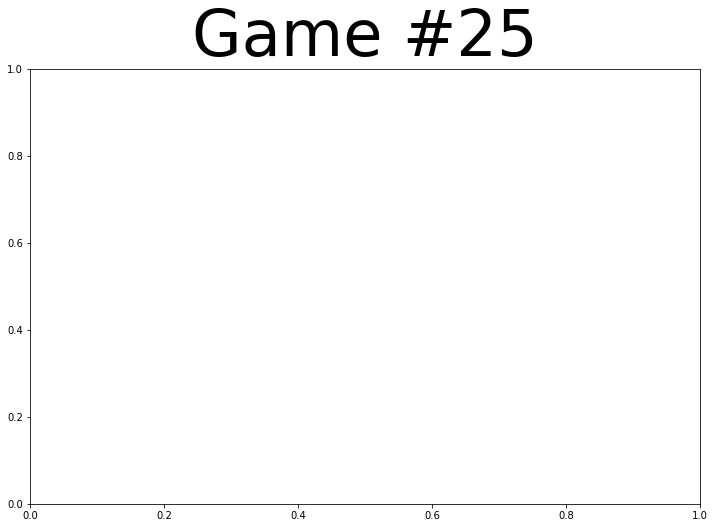

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

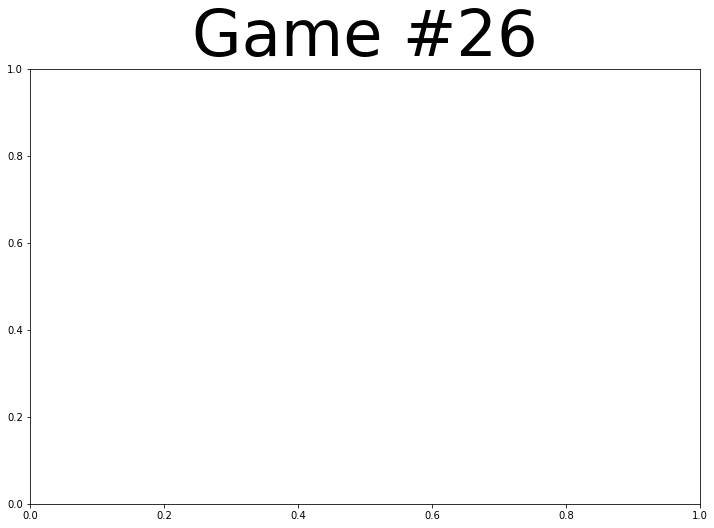

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

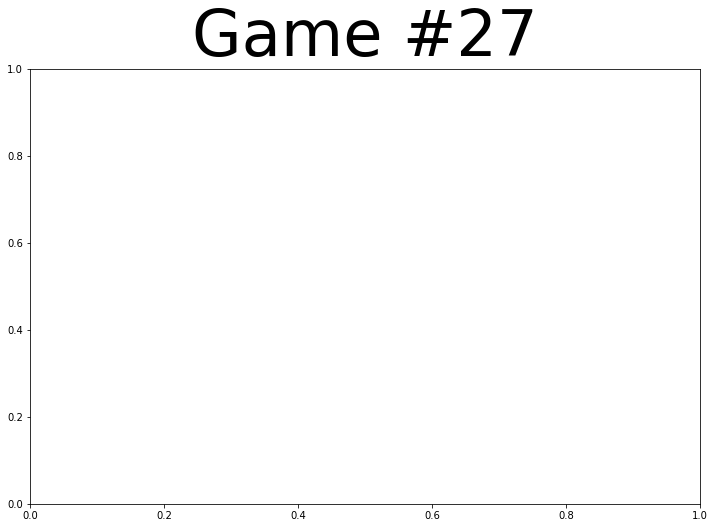

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

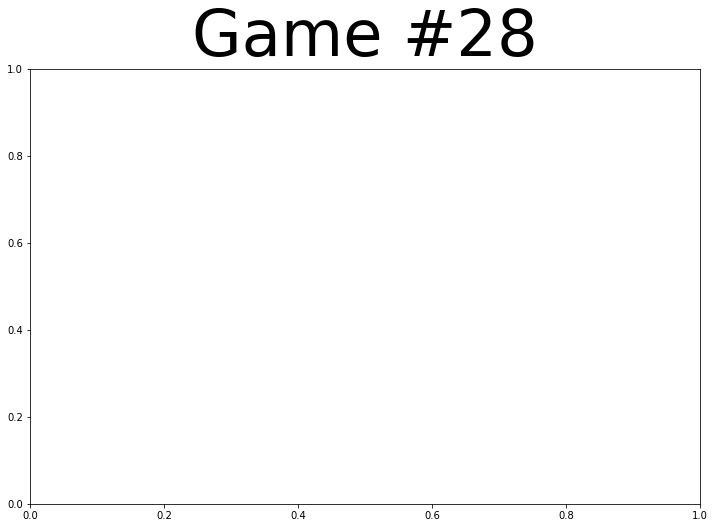

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torc

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([2, 16, 4, 4])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([2, 16, 4, 4])
torch.Size([2, 32, 4, 3])
torch.Size([2, 64, 3, 3])
torch.Size([2, 128, 3, 2])
torch.Size([2, 256, 2, 2])
torch.Size([2, 512, 2, 1])
torch.Size([2, 1024, 1, 1])
torch.Size([2, 1024])
torch.Size([2, 512])
torch.Size([2, 256])
torch.Size([2, 64])
torch.Size([2, 10])
torch.Size([2, 1])
torch.Size([2])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([3, 16, 4, 4])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 16, 4, 4])
torch.Size([3, 32, 4, 3])
torch.Size([3, 64, 3, 3])
torch.Size([3, 128, 3, 2])
torch.Size([3, 256, 2, 2])
torch.Size([3, 512, 2, 1])
torch.Size([3, 1024, 1, 1])
torch.Size([3, 1024])
torch.Size([3, 512])
torch.Size([3, 256])
torch.Size([3, 64])
torch.Size([3, 10])
torch.Size([3, 1])
torch.Size([3])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

boards:  torch.Size([4, 16, 4, 4])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([4, 16, 4, 4])
torch.Size([4, 32, 4, 3])
torch.Size([4, 64, 3, 3])
torch.Size([4, 128, 3, 2])
torch.Size([4, 256, 2, 2])
torch.Size([4, 512, 2, 1])
torch.Size([4, 1024, 1, 1])
torch.Size([4, 1024])
torch.Size([4, 512])
torch.Size([4, 256])
torch.Size([4, 64])
torch.Size([4, 10])
torch.Size([4, 1])
torch.Size([4])
x:    torch.Size([8, 16, 4, 4])
y:    torch.Size([8])
torch.Size([8, 16, 4, 4])
torch.Size([8, 32, 4, 3])
torch.Size([8, 64, 3, 3])
torch.Size([8, 128, 3, 2])
torch.Size([8, 256, 2, 2])
torch.Size([8, 512, 2, 1])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])
torch.Size([8, 512])
torch.Size([8, 256])
torch

AttributeError: 'NoneType' object has no attribute 'max'

In [634]:
results = []
driver = webdriver.Firefox()
graph = plt.plot([], [], 'b')[0]
dots256 = plt.plot([],[], 'ro')[0]
dots512 = plt.plot([],[], 'yo')[0]
dots1024 = plt.plot([],[], 'go')[0]
plt.xlim((0,100))
plt.ylim((0,25000))
for j in range(200):
    driver.get("https://gabrielecirulli.github.io/2048/")
    time.sleep(2)
    result = gen_sample_and_learn(driver,model)
    print(j, result)
    results.append(result)
    graph.set_data(np.arange(len(results)), np.array(results)[:, 2])
    dots_data =[[],[],[]]
    for i, d in enumerate(results):
        c = 0 if d[1]<=256 else (1 if d[1]==512 else 2)
        dots_data[c].append([i, d[2]])
    dots_graph = [dots256, dots512, dots1024]
    for i in range(3):
        if dots_data[i]:
            xy = np.array(dots_data[i])
            dots_graph[i].set_data(xy[:, 0], xy[:,1])
    plt.title("Game #%d"%j, fontsize=64)
    plt.draw()
    plt.pause(3)
    if result[1] >= 2048:
        break

In [ ]:
a=[1,2,3]

In [ ]:
np.array([np.array(a),np.array(a)])

1 (182, 128, 1784)

2 (315, 256, 3816)

3 (310, 256, 3796)

4 (155, 128, 1480)

5 (69, 32, 384)

6 (150, 128, 1440)

7 (98, 64, 744)

8 (47, 32, 236)

9 (124, 64, 1040)

10 (438, 512, 6064)

18 (154, 128, 1476)

In [ ]:
aaa= torch. tensor([[1,2,3,4]]*4)
aaa

In [ ]:
model(aaa)

In [551]:
model

Network(
  (conv1): Conv2d(16, 32, kernel_size=(1, 2), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(2, 1), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(1, 2), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 1), stride=(1, 1))
  (fc1): Linear(in_features=4096, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)